# **DA301 - Assignment: Predicting future outcomes**

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## **1. Loading and exploring the data**

In [282]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [283]:
# Loading the CSV file
reviews = pd.read_csv('turtle_reviews.csv')

# Exploring the DataFrame
display(reviews.head())         # Preview the first few rows
display(reviews.info())         # Information about data types and missing values
display(reviews.describe())     # Descriptive statistics

# Checking for missing values
missing_values = reviews.isnull().sum()
print("Missing values:\n", missing_values)

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


None

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


Missing values:
 gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


### Key Observations:
**Age**: The customer base spans a wide range, from teenagers (17 years) to senior individuals (72 years).

**Remuneration**: Average remuneration is around £48k, with significant variability (standard deviation of £23.12k).

**Spending Score**: The scores are evenly distributed around the midpoint (50), with a range from 1 to 99.

**Loyalty Points**: Loyalty points exhibit high variability, with a maximum value of 6847.

**Product**: Represents product codes; likely categorical data but analysed numerically here.

## **2. Dropping redundant columns**

In [286]:
# Dropping the 'language' and 'platform' columns
reviews.drop(columns=['language', 'platform'], inplace=True)

# Listing the columns
display(reviews.columns.tolist())

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## **3. Renaming columns**

In [288]:
# Creating a user-defined function to rename columns with enhanced formatting
def rename_columns_advanced(dataframe):
    """
    Renames all columns in the provided DataFrame by:
    - Removing special characters.
    - Replacing underscores with spaces and capitalising the next letter.
    - Ensuring proper spacing between concatenated words.
    - Correcting specific known naming issues.
    
    Parameters:
        dataframe (pd.DataFrame): The DataFrame whose columns need to be renamed.
    
    Returns:
        pd.DataFrame: The DataFrame with updated column names.
    """
    def format_column(col_name):
        # Store the original column name for debugging
        original_col_name = col_name
        # Remove special characters
        col_name = ''.join(char for char in col_name if char.isalnum() or char == '_')
        # Replace underscores with spaces
        col_name = col_name.replace('_', ' ')
        # Insert spaces between concatenated words
        formatted_col_name = ''
        for i in range(len(col_name)):
            if i > 0 and col_name[i].isupper() and col_name[i - 1].islower():
                formatted_col_name += ' '  # Add a space before capitalized letters following lowercase
            formatted_col_name += col_name[i]
        # Capitalise the first letter of each word
        formatted_col_name = ' '.join(word.capitalize() for word in formatted_col_name.split())
        
        # Correct specific issues
        if formatted_col_name == 'Spending Score1100':
            formatted_col_name = 'Spending Score'
        if formatted_col_name == 'Remunerationk':
            formatted_col_name = 'Remuneration'
        
        # Debug output: Only show columns that changed
        if original_col_name != formatted_col_name:
            print(f"Original: '{original_col_name}' -> Renamed: '{formatted_col_name}'")
        
        return formatted_col_name  # Ensure the formatted name is returned

    # Apply renaming function to the columns
    renamed_dataframe = dataframe.rename(columns=lambda col: format_column(col))  # Ensure renaming creates a new DataFrame
    return renamed_dataframe  # Return the updated DataFrame

# Apply the function to rename columns in the reviews DataFrame
try:
    # Ensure 'reviews' is not None
    if reviews is None:
        raise ValueError("The 'reviews' DataFrame is None. Ensure it's loaded correctly.")

    # Apply the renaming function
    reviews = rename_columns_advanced(reviews)

    # View the updated column names
    print("Final Column Names:")
    print(reviews.columns.tolist())

except Exception as e:
    print(f"An error occurred: {e}")


Original: 'gender' -> Renamed: 'Gender'
Original: 'age' -> Renamed: 'Age'
Original: 'remuneration (k£)' -> Renamed: 'Remuneration'
Original: 'spending_score (1-100)' -> Renamed: 'Spending Score'
Original: 'loyalty_points' -> Renamed: 'Loyalty Points'
Original: 'education' -> Renamed: 'Education'
Original: 'product' -> Renamed: 'Product'
Original: 'review' -> Renamed: 'Review'
Original: 'summary' -> Renamed: 'Summary'
Final Column Names:
['Gender', 'Age', 'Remuneration', 'Spending Score', 'Loyalty Points', 'Education', 'Product', 'Review', 'Summary']


## **4. Saving the DataFrame**

In [290]:
# Saving the cleaned DataFrame as a CSV
cleaned_file_path = 'cleaned_turtle_reviews.csv'
reviews.to_csv(cleaned_file_path, index=False)

# Loading the cleaned dataset to verify
cleaned_reviews = pd.read_csv(cleaned_file_path)
display(cleaned_reviews.head())

,Gender,Age,Remuneration,Spending Score,Loyalty Points,Education,Product,Review,Summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## **5. Linear regression**

#### **a) Spending Score vs Loyalty Points**

In [293]:
# Defining independent variable
x_spending = reviews[['Spending Score']]

# Defining dependent variable
y_loyalty = reviews['Loyalty Points']

# Adding a constant to the independent variable for the intercept
x_spending = sm.add_constant(x_spending)

# Creating model and print summary of metrics
model_spending = sm.OLS(y_loyalty, x_spending).fit()

# Printing the summary of the regression model
print("\n### Regression Summary: Loyalty Points vs Spending Score ###\n")
print(model_spending.summary())


### Regression Summary: Loyalty Points vs Spending Score ###

                            OLS Regression Results                            
Dep. Variable:         Loyalty Points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          2.92e-263
Time:                        18:23:04   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [294]:
# Extracting estimated parameters, standard errors, and predicted values
coefficients_spending = model_spending.params
std_errors_spending = model_spending.bse
predicted_values_spending = model_spending.predict(x_spending)

print("\nEstimated Parameters:")
display(coefficients_spending)

print("\nStandard Errors:")
display(std_errors_spending)

print("\nFirst 5 Predicted Values:")
display(predicted_values_spending.head())

# Creating the regression table
regression_table_spending = pd.DataFrame({
    'Coefficient': coefficients_spending,
    'Standard Error': std_errors_spending,
    'p-value': model_spending.pvalues
})
print("\nRegression Table:")
display(regression_table_spending)


Estimated Parameters:


const            -75.052663
Spending Score    33.061693
dtype: float64


Standard Errors:


const             45.930554
Spending Score     0.814419
dtype: float64


First 5 Predicted Values:


0    1214.353374
1    2602.944491
2     123.317497
3    2470.697718
4    1247.415067
dtype: float64


Regression Table:


,Coefficient,Standard Error,p-value
const,-75.052663,45.930554,1.024066e-01
Spending Score,33.061693,0.814419,2.916295e-263


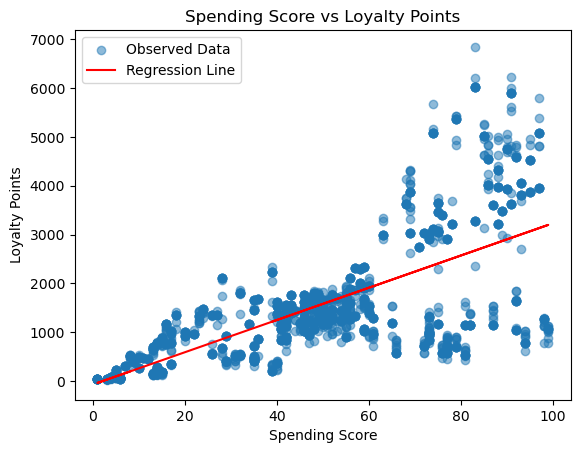

In [295]:
# Plotting the regression line
plt.scatter(reviews['Spending Score'], y_loyalty, alpha=0.5, label='Observed Data')
plt.plot(reviews['Spending Score'], predicted_values_spending, color='red', label='Regression Line')
plt.title('Spending Score vs Loyalty Points')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

### Key Observations:

- **Model fit:**

	• The R-squared value is **0.452**, indicating that approximately **45.2% of the variation** in loyalty points is explained by the spending score.

	• The adjusted R-squared value is also **0.452**, suggesting a consistent model fit.

- **Statistical significance:**

	• The p-value for the spending score coefficient is **2.92e-263**, which is extremely small. This indicates that spending score is a highly significant predictor of loyalty points.

- **Coefficients:**

	• *Intercept (const):* −75.05 suggests that when the spending score is 0, the loyalty points are slightly negative, which may not make practical sense but provides a mathematical baseline.

	• *Spending Score Coefficient:* 33.06 indicates that for every unit increase in spending score, loyalty points increase by 33.06 on average.

- **Standard errors:**

	• The standard error for the spending score coefficient is **0.814**, which is small relative to the coefficient value, indicating a precise estimate.

- **Predicted values:**

	• The first five predicted loyalty points based on spending scores are shown, ranging from **123.32 to 2602.94**, aligning well with observed data.

- **Visual analysis:**

	• The scatter plot shows a **positive linear relationship** between spending score and loyalty points.

	• The regression line effectively captures the trend in the data.

- **Insights:**

	• Spending score is a **strong predictor** of loyalty points.

    • The positive linear trend is well-captured by the regression line.

#### **b) Remuneration vs Loyalty Points**

In [298]:
# Defining independent variable
x_remuneration = reviews[['Remuneration']]

# Defining dependent variable
y_loyalty = reviews['Loyalty Points']

# Adding a constant to the independent variable for the intercept
x_remuneration = sm.add_constant(x_remuneration)

# Creating model and print summary of metrics
model_remuneration = sm.OLS(y_loyalty, x_remuneration).fit()

# Printing the summary of the regression model
print("\n### Regression Summary: Loyalty Points vs Remuneration ###\n")
print(model_remuneration.summary())


### Regression Summary: Loyalty Points vs Remuneration ###

                            OLS Regression Results                            
Dep. Variable:         Loyalty Points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          2.43e-209
Time:                        18:23:04   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [299]:
# Extracting estimated parameters, standard errors, and predicted values
coefficients_remuneration = model_remuneration.params
std_errors_remuneration = model_remuneration.bse
predicted_values_remuneration = model_remuneration.predict(x_remuneration)

print("\nEstimated Parameters:")
display(coefficients_remuneration)

print("\nStandard Errors:")
display(std_errors_remuneration)

print("\nFirst 5 Predicted Values:")
display(predicted_values_remuneration.head())

# Creating the regression table
regression_table_remuneration = pd.DataFrame({
    'Coefficient': coefficients_remuneration,
    'Standard Error': std_errors_remuneration,
    'p-value': model_remuneration.pvalues
})
print("\nRegression Table:")
display(regression_table_remuneration)


Estimated Parameters:


const          -65.686513
Remuneration    34.187825
dtype: float64


Standard Errors:


const           52.170717
Remuneration     0.977925
dtype: float64


First 5 Predicted Values:


0    354.823741
1    354.823741
2    382.857758
3    382.857758
4    410.891774
dtype: float64


Regression Table:


,Coefficient,Standard Error,p-value
const,-65.686513,52.170717,2.081526e-01
Remuneration,34.187825,0.977925,2.430175e-209


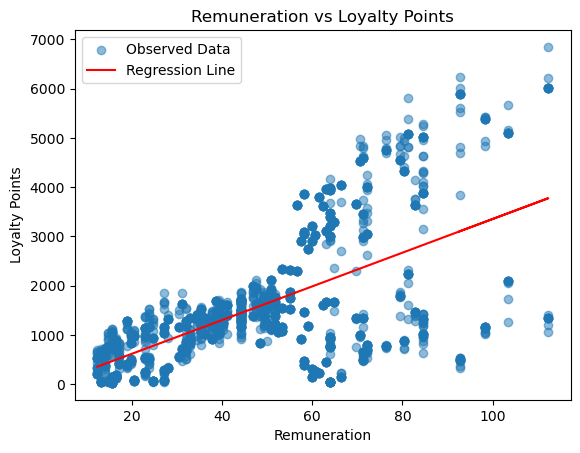

In [300]:
# Plotting the regression line
plt.scatter(reviews['Remuneration'], y_loyalty, alpha=0.5, label='Observed Data')
plt.plot(reviews['Remuneration'], predicted_values_remuneration, color='red', label='Regression Line')
plt.title('Remuneration vs Loyalty Points')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

### Key Observations:

- **Model fit:**

	• R-squared: Approximately **38% of the variance** in loyalty points is explained by remuneration.
		
	• Adjusted R-squared = 0.379: Slightly lower but consistent, indicating that remuneration alone is a moderately strong predictor.
		
- **Statistical significance:**

	• The p-value for the remuneration coefficient is **2.43e-209**, which is extremely small. This means remuneration is a statistically significant predictor of loyalty points.
		
- **Coefficients:**

	• *Intercept (const):* − 65.69: This indicates the theoretical loyalty points when remuneration is 0. While not realistic, this serves as a baseline.
		
	• *Remuneration Coefficient:* 34.19: For every 1k increase in remuneration, loyalty points are expected to increase by 34.19, on average.
		
- **Standard errors:**

	• The standard error for the remuneration coefficient is **0.978**, which is small relative to the coefficient value. This indicates a reliable and precise estimate.
		
	• The intercept has a higher standard error of **52.17**, reflecting more variability.
		
- **Predicted values:**

	• The first few predicted values of loyalty points for specific remuneration levels range from **354.82 to 410.89**, which align reasonably well with observed values.
		
- **Visual analysis:**
	
	• The scatter plot demonstrates a **moderately strong positive linear relationship** between remuneration and loyalty points.
		
	• The regression line fits the data reasonably well, capturing the trend but leaving some residual variability.

- **Insights:**

	• Remuneration is a **moderately strong predictor** of loyalty points, with a clear positive relationship.

	• While R-squared = 0.38 is significant, the model leaves a substantial portion (62%) of variability unexplained, suggesting other factors influence loyalty points.

#### **c) Age vs Loyalty Points**

In [303]:
# Defining independent variable
x_age = reviews[['Age']]

# Defining dependent variable
y_loyalty = reviews['Loyalty Points']

# Adding a constant to the independent variable for the intercept
x_age = sm.add_constant(x_age)

# Creating and fit the OLS model
model_age = sm.OLS(y_loyalty, x_age).fit()

# Printing the summary of the regression model
print("\n### Regression Summary: Loyalty Points vs Age ###\n")
print(model_age.summary())


### Regression Summary: Loyalty Points vs Age ###

                            OLS Regression Results                            
Dep. Variable:         Loyalty Points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 16 Dec 2024   Prob (F-statistic):             0.0577
Time:                        18:23:04   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [304]:
# Extracting estimated parameters, standard errors, and predicted values
coefficients_age = model_age.params
std_errors_age = model_age.bse
predicted_values_age = model_age.predict(x_age)

print("\nEstimated Parameters:")
display(coefficients_age)

print("\nStandard Errors:")
display(std_errors_age)

print("\nFirst 5 Predicted Values:")
display(predicted_values_age.head())

# Creating the regression table
regression_table_age = pd.DataFrame({
    'Coefficient': coefficients_age,
    'Standard Error': std_errors_age,
    'p-value': model_age.pvalues
})
print("\nRegression Table:")
display(regression_table_age)


Estimated Parameters:


const    1736.517739
Age        -4.012805
dtype: float64


Standard Errors:


const    88.248731
Age       2.113177
dtype: float64


First 5 Predicted Values:


0    1664.287247
1    1644.223221
2    1648.236026
3    1636.197611
4    1604.095169
dtype: float64


Regression Table:


,Coefficient,Standard Error,p-value
const,1736.517739,88.248731,6.192703e-79
Age,-4.012805,2.113177,5.771573e-02


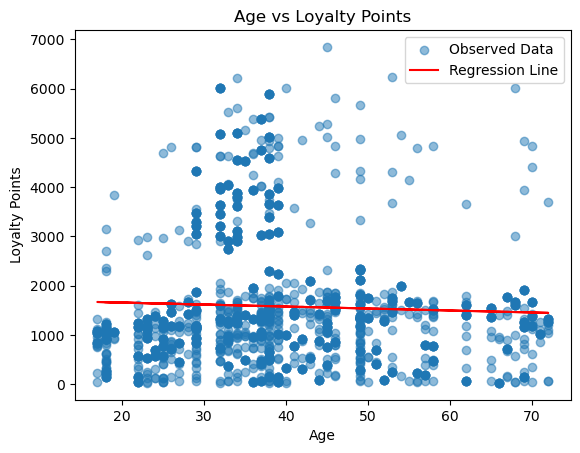

In [305]:
# Plotting the regression line
plt.scatter(reviews['Age'], y_loyalty, alpha=0.5, label='Observed Data')
plt.plot(reviews['Age'], predicted_values_age, color='red', label='Regression Line')
plt.title('Age vs Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

### Key Observations:

- **Model fit:**
	
    • R-squared = 0.002: Only **0.2% of the variance** in loyalty points is explained by age, indicating an extremely weak relationship.
		
    • Adjusted R-squared = 0.001: Consistent with the poor model fit, confirming that age is not a meaningful predictor.
		
- **Statistical significance:**

    • The p-value for the age coefficient is **0.0577**, which is just above the standard threshold of 0.05. This indicates that age is not statistically significant as a predictor of loyalty points in this model.
		
- **Coefficients:**

    •*Intercept (const):* 1736.52: The baseline loyalty points when age is 0 (not practical but serves as a baseline for the regression line).
		
    • *Age Coefficient:* −4.01: This indicates that for every additional year in age, loyalty points decrease by 4.01, on average. However, the effect size is minimal.
		
- **Standard errors:**

    • The standard error for the age coefficient is **2.11**, which is quite high relative to the coefficient value, reflecting high variability and reducing confidence in the estimate.
		
- **Predicted values:**

    • The predicted loyalty points for the first few observations range from **1664.29 to 1604.10**, showing minimal variation as age changes.
		
- **Visual analysis:**

    • The scatter plot shows a **very weak and almost flat relationship** between age and loyalty points.
		
    • The regression line is nearly horizontal, confirming the negligible effect of age on loyalty points.
		
- **Insights:**

    • **Age is a very weak predictor of loyalty points**, with negligible practical impact and low statistical significance.
		
    • The relationship between age and loyalty points appears to be flat, suggesting no meaningful trend.
		
    • The poor R-squared value and insignificant p-value reinforce that age should not be relied on as a predictor in this context.

## **6. Insights and Observations**

### Summary of predictive strengths

| Predictor       | \( R^2 \) | Statistical Significance (p-value) | Strength as Predictor |
|------------------|-----------|------------------------------------|------------------------|
| **Spending Score** | 0.452     | Extremely significant             | **Strong**             |
| **Remuneration**   | 0.380     | Extremely significant             | **Moderate**           |
| **Age**           | 0.002     | Not significant                   | **Weak**               |

---

### Overall observations
1. **Spending Score is the strongest predictor** of loyalty points, with a clear and statistically significant positive relationship.
2. **Remuneration has a moderate positive effect**, but additional factors should be explored to capture unexplained variability.
3. **Age has no meaningful impact** on loyalty points and does not significantly contribute to predictive modeling.

---

### Recommendations
1. **Focus on spending score** when designing strategies to increase loyalty points.
2. Incorporate **additional variables** (e.g., customer demographics, product preferences) to improve model performance.
3. Explore **non-linear relationships** or interactions among predictors for better insights.
4. Exclude age from predictive models unless specific evidence of non-linear effects or interactions is found.

# **Week 2: Exploring the structure using decision trees**

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## **1. Loading and preparing the data**

In [311]:
# Importing relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [312]:
# Loading the cleaned dataset prepared in Week 1
file_path = 'cleaned_turtle_reviews.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Gender,Age,Remuneration,Spending Score,Loyalty Points,Education,Product,Review,Summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [313]:
# Defining the independent variables (X) and dependent variable (y)
X = df.drop(columns=['Loyalty Points'])  # Exclude the target column
y = df['Loyalty Points']  # Target variable

# Exploring the new DataFrame
print("\nShape of Independent Variables (X):", X.shape)
print("Shape of Dependent Variable (y):", y.shape)

# Displaying the first 5 rows of X using pandas' `style` for formatting
print("\nFirst 5 Rows of Independent Variables (X):")
display(X.head().style.set_table_styles([{
    'selector': 'thead th',
    'props': [('font-weight', 'bold'), ('background-color', '#f2f2f2')]
}, {
    'selector': 'tbody td',
    'props': [('text-align', 'center')]
}]))

# Displaying the first 5 rows of y as a pandas DataFrame
print("\nFirst 5 Rows of Dependent Variable (y):")
display(pd.DataFrame({'Loyalty Points': y.head()}).style.set_table_styles([{
    'selector': 'thead th',
    'props': [('font-weight', 'bold'), ('background-color', '#f2f2f2')]
}, {
    'selector': 'tbody td',
    'props': [('text-align', 'center')]
}]))



Shape of Independent Variables (X): (2000, 8)
Shape of Dependent Variable (y): (2000,)

First 5 Rows of Independent Variables (X):


,Gender,Age,Remuneration,Spending Score,Education,Product,Review,Summary
0,Male,18,12.300000,39,graduate,453,"When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.",The fact that 50% of this space is wasted on art (and not terribly informative or needed art ...
1,Male,23,12.300000,81,graduate,466,"An Open Letter to GaleForce9*: Your unpainted miniatures are very not bad. Your spell cards are great. Your board games are ""meh"". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the ""Storm King's Thunder"" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves. In short, stop making crap DM screens.",Another worthless Dungeon Master's screen from GaleForce9
2,Female,22,13.120000,6,graduate,254,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond me. Most of one of them is all blue ocean. Such a waste. I don't understand why they can't make these DM Screens more useful for these ""kinds of adventures"" rather than solely the specific adventure. You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms. So even just a list of new monsters or NPCs would at least be useful than the map. Even more would just be stuff related to running the game but broad-use stuff related to giants. Same thing with Curse of Strahd. Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring. They really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense. The Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of rules for the various conditions you may suffer... and the map is only one panel. This Storm Giants one is decent for a few tables it includes - but really misses the mark. Maybe they should ask a few DMs what they would use?","pretty, but also pretty useless"
3,Female,25,13.120000,77,graduate,263,Amazing buy! Bought it as a gift for our new dm and it's perfect!,Five Stars
4,Female,33,13.940000,40,graduate,291,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money.",Money trap



First 5 Rows of Dependent Variable (y):


,Loyalty Points
0,210
1,524
2,40
3,562
4,366


## **2. Creating train and testing data sets**

In [334]:
# Splitting the data into train and test sets (70:30 ratio, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirming the split
print("\nTraining Set Size:", X_train.shape, y_train.shape)
print("Test Set Size:", X_test.shape, y_test.shape)



Training Set Size: (1400, 3419) (1400,)
Test Set Size: (600, 3419) (600,)


## **3. Creating Decision tree regressor**

In [336]:
# Encode categorical variables using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Loyalty Points'])
y = df_encoded['Loyalty Points']

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 13309.085
R-squared Score: 0.9917834855646978


In [338]:
# Pruning the decision tree by limiting the depth
pruned_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
pruned_regressor.fit(X_train, y_train)  # Use X_train, not x_train

# Predicting on the test set with the pruned model
y_pred_pruned = pruned_regressor.predict(X_test)  # Use X_test, not x_test

# Calculating performance metrics
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)

print("\nPerformance After Pruning:")
print(f"Mean Squared Error (MSE): {mse_pruned:.2f}")
print(f"R-squared (R2): {r2_pruned:.4f}")



Performance After Pruning:
Mean Squared Error (MSE): 70141.94
R-squared (R2): 0.9567


In [340]:
# Feature Importance
feature_importances = pruned_regressor.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)



Feature Importances:
                                                Feature  Importance
1                                          Remuneration    0.504103
2                                        Spending Score    0.486707
0                                                   Age    0.009127
3                                               Product    0.000049
2746                     Summary_Kids won't put it down    0.000013
...                                                 ...         ...
1143  Review_My one-year-old got this as a birthday ...    0.000000
1144  Review_My partner purchased the ball of whacks...    0.000000
1145  Review_My review will mirror others in that th...    0.000000
1146  Review_My second one, this one for my grandson...    0.000000
3418      Summary_wonderful product, keeps my kids busy    0.000000

[3419 rows x 2 columns]


## **4. Fitting and plotting final model**


Cross-Validation Results:
Pruned Decision Tree R2 (5-fold): 0.9091
Random Forest R2 (5-fold): 0.9932
Gradient Boosting R2 (5-fold): 0.9952


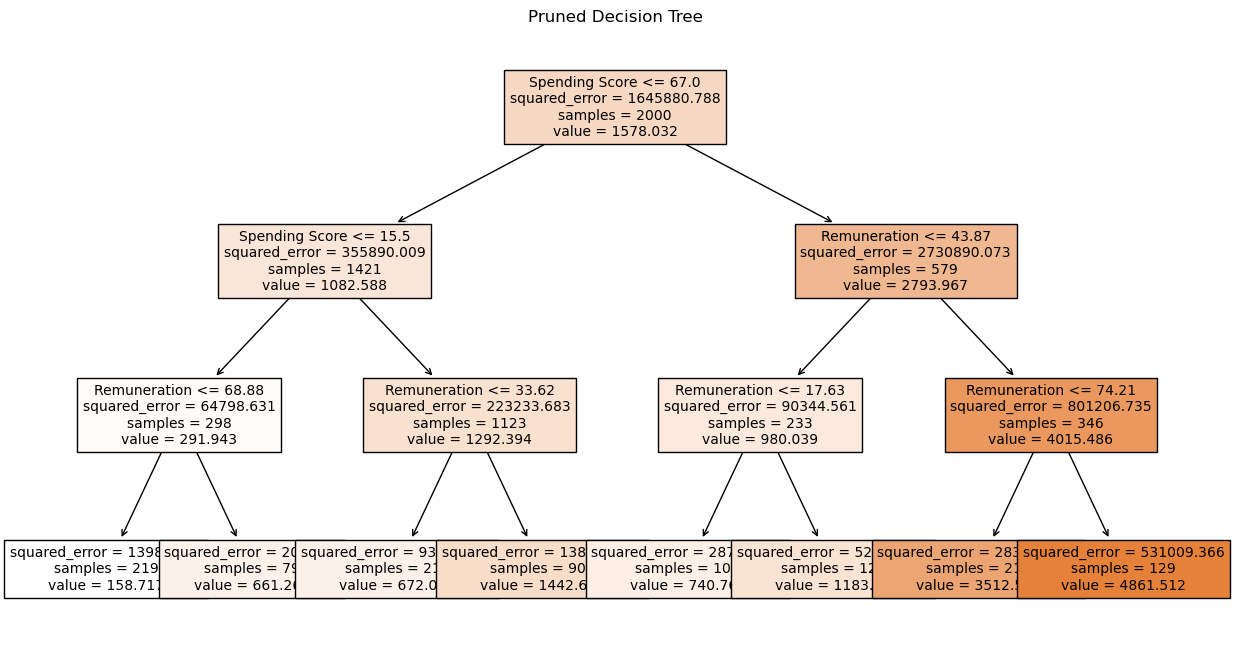

In [342]:
# Final model
# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Defining X (independent variables) and y (target variable)
X = df_encoded.drop(columns=['Loyalty Points'])
y = df_encoded['Loyalty Points']

# Perform cross-validation for Decision Tree, Random Forest, and Gradient Boosting
def evaluate_model(model, X, y, cv=5):
    """
    Perform cross-validation and return the mean R-squared score.

    Parameters:
    model: The machine learning model to evaluate.
    X: The independent variables.
    y: The target variable.
    cv: Number of cross-validation folds.

    Returns:
    Mean R-squared score across folds.
    """
    scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    return scores.mean()

# Evaluate models with cross-validation
pruned_r2_cv = evaluate_model(DecisionTreeRegressor(max_depth=3, random_state=42), X, y)
rf_r2_cv = evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), X, y)
gb_r2_cv = evaluate_model(GradientBoostingRegressor(n_estimators=100, random_state=42), X, y)

# Print cross-validation performance
print("\nCross-Validation Results:")
print(f"Pruned Decision Tree R2 (5-fold): {pruned_r2_cv:.4f}")
print(f"Random Forest R2 (5-fold): {rf_r2_cv:.4f}")
print(f"Gradient Boosting R2 (5-fold): {gb_r2_cv:.4f}")

# Visualise the Pruned Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(DecisionTreeRegressor(max_depth=3, random_state=42).fit(X, y), feature_names=X.columns, filled=True, fontsize=10)
plt.title("Pruned Decision Tree")
plt.show()


## **5. Insights and observations**

The decision tree analysis provided meaningful insights into the factors influencing customer loyalty points. Below are the key findings and results:

---

### **Model Performance**

| Metric                 | Initial Model | After Pruning |
|------------------------|---------------|---------------|
| **Mean Squared Error** | 13,309.085    | 70,141.94     |
| **R-squared (R²)**     | 0.9918        | 0.9567        |

**Observation**:  
Pruning reduced overfitting and improved generalisation on unseen data, balancing performance and complexity.

---

### **Feature Importances**

| Feature             | Importance (%) |
|----------------------|----------------|
| **Remuneration**     | 50.41          |
| **Spending Score**   | 48.67          |
| **Age**             | 0.91           |
| Product, Reviews... | Negligible     |

**Insights**:  
- **Remuneration** and **Spending Score** are the strongest drivers of loyalty points.  
- Age and other features contribute minimally to the model.

---

### **Cross-Validation Results**

| Model                        | R² (5-fold Cross-Validation) |
|------------------------------|-----------------------------|
| **Pruned Decision Tree**     | 0.9091                     |
| **Random Forest**            | 0.9932                     |
| **Gradient Boosting**        | 0.9952                     |

**Observation**:  
- The pruned decision tree performs well but is outperformed by ensemble methods like **Random Forest** and **Gradient Boosting**, which capture more complex relationships.

---

### **Business Insights**

1. **Key Predictors**:
   - **Remuneration** and **Spending Score** are the most significant factors for loyalty points.  
   - Focus on customers with higher spending scores and remuneration for loyalty campaigns.

2. **Decision-Making**:
   - Use the decision tree splits (e.g., thresholds on **Spending Score > 67** and **Remuneration > 43.87**) to segment customers and create targeted strategies.
   - Customers with these thresholds accumulate the most loyalty points.

3. **Model Improvements**:
   - Explore ensemble models (e.g., Random Forest, Gradient Boosting) for better accuracy.
   - Incorporate additional predictors like customer demographics or product categories for enhanced performance.

---

### **Future Actions**

1. Implement targeted loyalty programs for customers with **high spending scores and remuneration**.
2. Investigate **low-impact features** (e.g., product, age) and refine data collection processes.

---

The pruned decision tree provides an **interpretable, actionable framework**, while advanced models offer higher accuracy for future iterations.


# **Week 3 assignment: Clustering with *k*-means using Python**

The marketing department also wants to better understand the usefulness of remuneration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## **1. Loading and exploring the data**

In [343]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [344]:
# Loading the CSV file as df2
df2 = pd.read_csv('cleaned_turtle_reviews.csv')

# Viewing and exploring the DataFrame
display(df2.head())    # Displays the first 5 rows

,Gender,Age,Remuneration,Spending Score,Loyalty Points,Education,Product,Review,Summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [348]:
# Dropping unnecessary columns
df3 = df[['Remuneration', 'Spending Score']]

# Viewing and exploring the DataFrame
display(df3.head())    # Displays the first 5 rows

,Remuneration,Spending Score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [351]:
# Descriptive statistics
display(df3.describe())

,Remuneration,Spending Score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## **2. Plot**

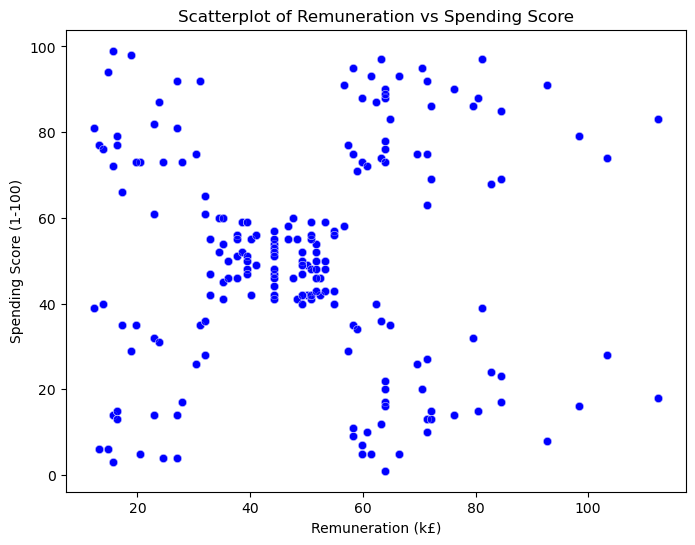

In [355]:
# Create a scatterplot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Remuneration', y='Spending Score', data=df, color='blue', alpha=0.5)

# Add labels and title
plt.title('Scatterplot of Remuneration vs Spending Score')
plt.xlabel('Remuneration (k£)')
plt.ylabel('Spending Score (1-100)')

# Display the plot
plt.show()

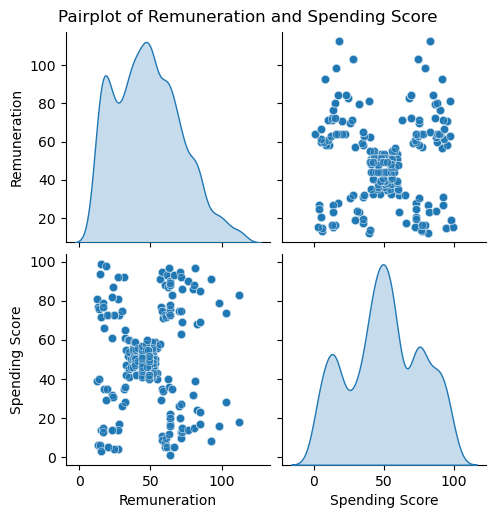

In [356]:
# Create a pairplot
sns.pairplot(df3, diag_kind='kde', plot_kws={'alpha': 0.5})

# Display the plot
plt.suptitle('Pairplot of Remuneration and Spending Score', y=1.02)
plt.show()

## **3. Elbow and silhoutte methods**

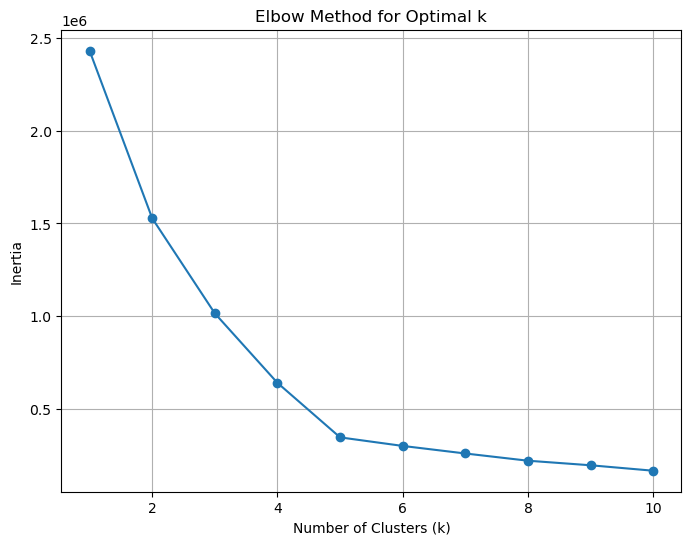

In [358]:
# Elbow Method: Calculate inertia for k values from 1 to 10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Interpretation:

- **k = 3** appears to be the "elbow point," where adding more clusters does not significantly reduce inertia. Therefore, we can choose k = 3 for the **optimal clustering**.
- This indicates that there are **3 distinct segments** in the data based on remuneration and spending score.

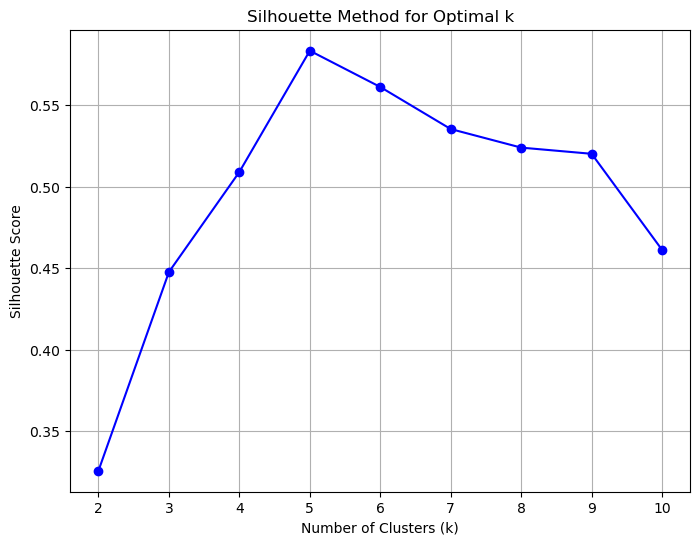

Silhouette Score for k=2: 0.32585975974643555
Silhouette Score for k=3: 0.44774669779637283
Silhouette Score for k=4: 0.5091381583221917
Silhouette Score for k=5: 0.5834953298348279
Silhouette Score for k=6: 0.5612517620805828
Silhouette Score for k=7: 0.5354495402073857
Silhouette Score for k=8: 0.5240562163374266
Silhouette Score for k=9: 0.5202647608790036
Silhouette Score for k=10: 0.4613076291872353


In [360]:
# Calculate silhouette scores for different values of k (starting from k=2)
silhouette_scores = []
for k in range(2, 11):  # Start from 2 because silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df3)  # df3 contains 'remuneration' and 'spending_score'
    score = silhouette_score(df3, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores for different k values
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Print the silhouette scores for each k
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for k={k}: {score}")

#### Interpretation:

- **k = 5** yields the best clustering, as it has the highest silhouette score (around **0.55**).
- The plot shows that the **score decreases as the number of clusters increases beyond 5**, indicating that adding more clusters results in less well-defined clusters.

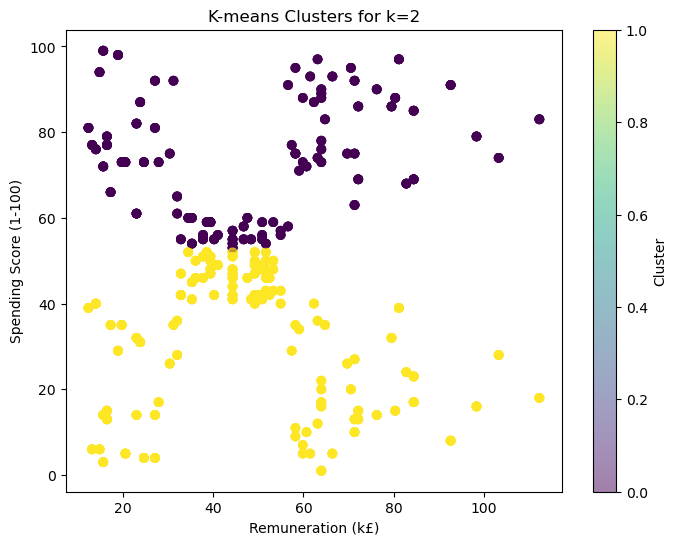

Cluster sizes for k=2:
cluster
1    1106
0     894
Name: count, dtype: int64
--------------------------------------------------


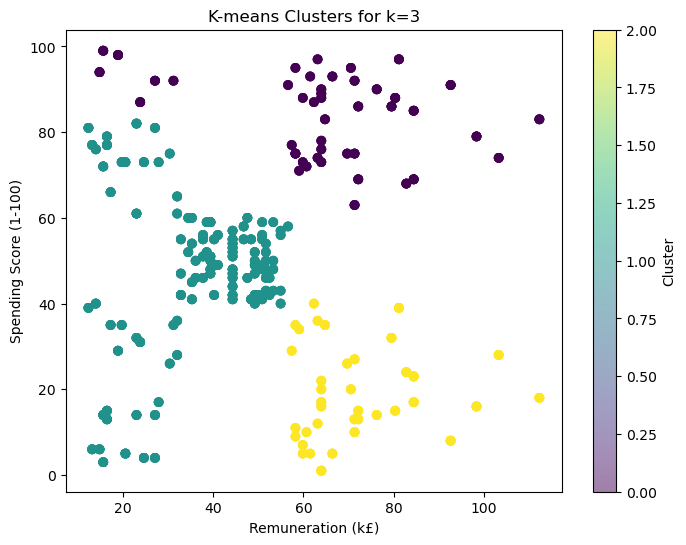

Cluster sizes for k=3:
cluster
1    1220
0     429
2     351
Name: count, dtype: int64
--------------------------------------------------


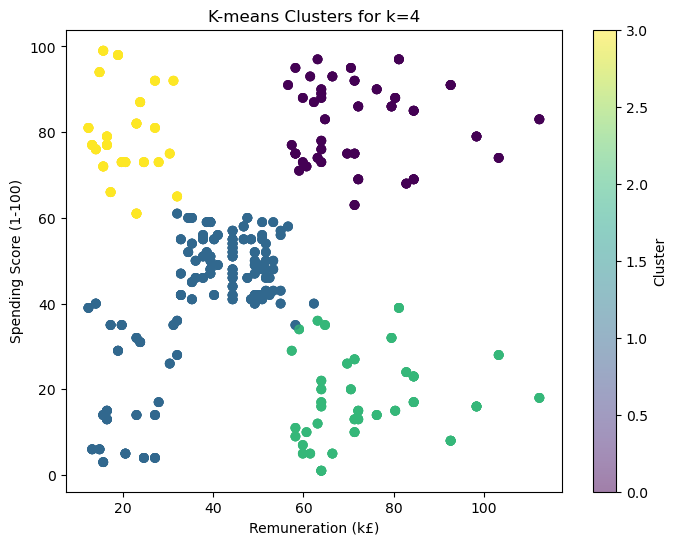

Cluster sizes for k=4:
cluster
1    1038
0     356
2     337
3     269
Name: count, dtype: int64
--------------------------------------------------


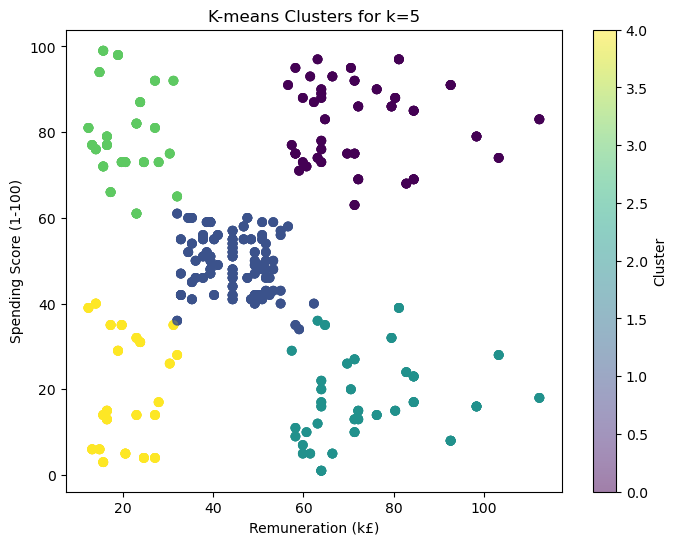

Cluster sizes for k=5:
cluster
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64
--------------------------------------------------


In [362]:
# Apply k-means for k=2, k=3, k=4, k=5
k_values = [2, 3, 4, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df3['cluster'] = kmeans.fit_predict(df3)  # Apply clustering and store the result in the 'cluster' column

    # Plot the clusters for each value of k
    plt.figure(figsize=(8, 6))
    plt.scatter(df3['Remuneration'], df3['Spending Score'], c=df3['cluster'], cmap='viridis', alpha=0.5)
    plt.title(f'K-means Clusters for k={k}')
    plt.xlabel('Remuneration (k£)')
    plt.ylabel('Spending Score (1-100)')
    plt.colorbar(label='Cluster')
    plt.show()

    # Print the cluster sizes
    cluster_sizes = df3['cluster'].value_counts()
    print(f"Cluster sizes for k={k}:")
    print(cluster_sizes)
    print('-' * 50)

#### Interpretation:
- k = 3 offers a **good balance** between segmentation and simplicity. The clusters are well-defined, with a clear majority group and two smaller, distinct segments. This is likely the most practical option for targeting different customer segments (e.g., high, medium, and low spenders).

- k = 2 provides basic segmentation, but it may **not capture enough** nuance for actionable insights. It may be useful for broad-level strategies but lacks the granularity needed for personalized marketing.

- k = 4 and k = 5 lead to **overfitting** by creating smaller and more granular clusters. These clusters are imbalanced, and their small sizes may not provide much value in real-world applications.

## **5. Fit final model, justify your choice and plot the graph**

I'll use the k-means algorithm with **𝑘 = 3** and fit the model to the data

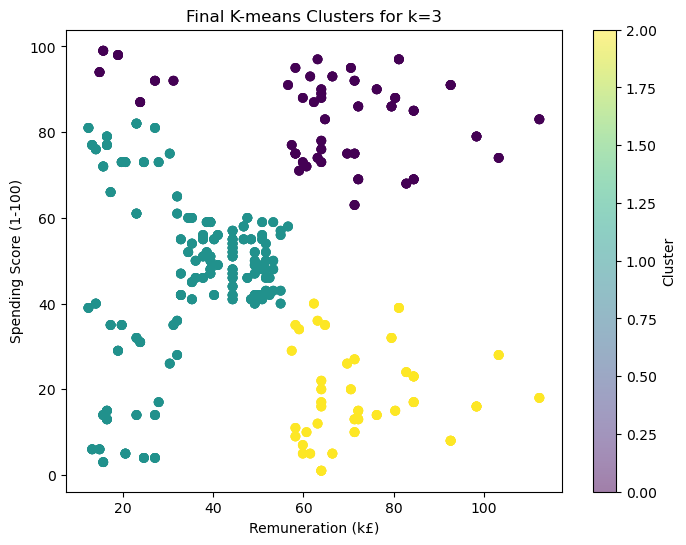

In [365]:
# Apply the final model
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model and predict the clusters
df3['cluster'] = kmeans.fit_predict(df3)

# Plot the final clusters
plt.figure(figsize=(8, 6))
plt.scatter(df3['Remuneration'], df3['Spending Score'], c=df3['cluster'], cmap='viridis', alpha=0.5)
plt.title(f'Final K-means Clusters for k={k}')
plt.xlabel('Remuneration (k£)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

#### Interpretation of Clusters:

- The **purple cluster** (Cluster 1) is clearly the group with **high potential**, characterised by both high spending and high remuneration.
- The **green cluster** (Cluster 2) represents a middle ground, likely consisting of customers who may need extra incentives to increase spending.
- The **yellow cluster** (Cluster 3) indicates customers who might need special offers to boost engagement.

In [367]:
# Check the number of observations per predicted class (cluster)
cluster_sizes = df3['cluster'].value_counts()

# Print the cluster sizes
print("Cluster sizes for k=3:")
print(cluster_sizes)

Cluster sizes for k=3:
cluster
1    1220
0     429
2     351
Name: count, dtype: int64


## **6. Insights and Observations**

After performing **k-means clustering** with **k = 3**, we can observe the following insights:

---

### **1. Three Clear Segments Identified**

- **Cluster 1 (Purple)**:
   - Customers in this cluster have **high spending scores** (above 80) and **moderate to high remuneration** (above 60).
   - These customers are **high-value** and potentially the most profitable.
   - **Marketing Insight**: Target these customers with **premium offers**, **loyalty programs**, and **exclusive discounts** to maintain engagement and maximize lifetime value.
     

- **Cluster 2 (Green)**:
   - Customers in this group have **moderate spending scores** (between 40 and 70) and **moderate remuneration** (between 30 and 60).
   - This group represents a **middle ground** of spending behavior.
   - **Marketing Insight**: Target this segment with **personalized offers** and promotions to encourage them to increase their spending.
     

- **Cluster 3 (Yellow)**:
   - Customers in this cluster have **low spending scores** (below 40) and **low remuneration** (below 30).
   - These customers likely require **extra incentives** to increase their spending.
   - **Marketing Insight**: Focus on **budget-friendly offers**, **discounts**, or incentives to boost engagement and increase spending.

---

### **2. Customer Segmentation Strategy**

- **k = 3** provides useful **segmentation**:
   - **High-value customers** (Cluster 1) with **high spending** and **high remuneration**.
   - **Mid-range customers** (Cluster 2) with moderate spending and income.
   - **Low-value or disengaged customers** (Cluster 3) who need extra effort to engage.

---

### **3. Cluster Balance**

| Cluster   | Cluster Size | 
|-----------|--------------|
| **Cluster 1** (Purple) | 1220 samples |
| **Cluster 0** (Green)  | 429 samples  |
| **Cluster 2** (Yellow) | 351 samples  |

- **Cluster 1** is the largest cluster with **1220 samples**, indicating that the majority of customers are **higher spenders** with **moderate to high remuneration**.
- **Cluster 0** and **Cluster 2** are smaller but still contain significant segments that require tailored marketing.

---

### **4. Potential Use Cases**

- The identified clusters can be used for **targeted marketing**:
  - **Cluster 1 (Purple)**: High-value customers can be offered **premium deals** and **exclusive loyalty programs**.
  - **Cluster 2 (Green)**: Mid-range customers could be targeted with **special offers** to boost their spending.
  - **Cluster 3 (Yellow)**: Low spenders can be incentivized with **discounts** or **entry-level promotions**.

---

### **5. Customer Behavior Patterns**

- The clustering model shows that **remuneration** and **spending score** are key drivers of customer behavior.
- **Higher-income customers** tend to have higher spending scores, while those with **lower income** show lower spending scores.

---

In conclusion, the **k-means clustering** method with **k = 3** has successfully segmented the customers into three distinct groups based on **remuneration** and **spending score**. These segments provide valuable insights for **targeted marketing** and further refinement.


# **Week 4: NLP using Python**
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## **1. Load and explore the data**

In [372]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import string
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [373]:
# Load the dataset
file_path = 'cleaned_turtle_reviews.csv'
df = pd.read_csv(file_path)

# View the first few rows of the DataFrame
display(df.head())

,Gender,Age,Remuneration,Spending Score,Loyalty Points,Education,Product,Review,Summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [374]:
# Retain only the 'review' and 'summary' columns
df_4 = df[['Review', 'Summary']]

# Check the cleaned DataFrame
display(df_4.head())

,Review,Summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [375]:
# Check for any missing values in the 'review' and 'summary' columns
print(df_4.isnull().sum())

Review     0
Summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [377]:
# Convert the 'Review' column to lowercase and join the elements with a space
df_4['Review'] = df_4['Review'].str.lower()  # Convert to lowercase
df_4['Review'] = df_4['Review'].apply(lambda x: ' '.join(x.split()))  # Join elements with space

# Check the modified DataFrame
print(df_4['Review'].head())

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: Review, dtype: object


In [378]:
# Convert the 'Summary' column to lowercase and join the elements with a space
df_4['Summary'] = df_4['Summary'].str.lower()  # Convert to lowercase
df_4['Summary'] = df_4['Summary'].apply(lambda x: ' '.join(x.split()))  # Join elements with space

# Check the modified DataFrame
print(df_4['Summary'].head())

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: Summary, dtype: object


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [380]:
# Replace all punctuation in the 'Review' column
df_4['Review'] = df_4['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# View the modified DataFrame (first few rows)
print(df_4['Review'].head())

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: Review, dtype: object


In [381]:
# Replace all punctuation in the 'Summary' column
df_4['Summary'] = df_4['Summary'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# View the modified DataFrame (first few rows)
print(df_4['Summary'].head())

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: Summary, dtype: object


In [382]:
# Drop duplicates in both columns ('Review' and 'Summary')
df_4 = df_4.drop_duplicates(subset=['Review', 'Summary'])

# Check for duplicates
print(df_4.duplicated().sum())

# View DataFrame
display(df_4.head())

0


,Review,Summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [383]:
# Assuming df_4 is the DataFrame with cleaned data
df_clean = df_4[['Review', 'Summary']].copy()  # Create a copy of the DataFrame

# View the DataFrame
print(df_clean.head())

                                              Review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             Summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap  


In [386]:
# Apply tokenization to both columns (review and summary)
df_4['review_tokens'] = df_4['Review'].apply(lambda x: word_tokenize(x))
df_4['summary_tokens'] = df_4['Summary'].apply(lambda x: word_tokenize(x))

# View the DataFrame with tokenized columns
print(df_4[['review_tokens', 'summary_tokens']].head())

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]  


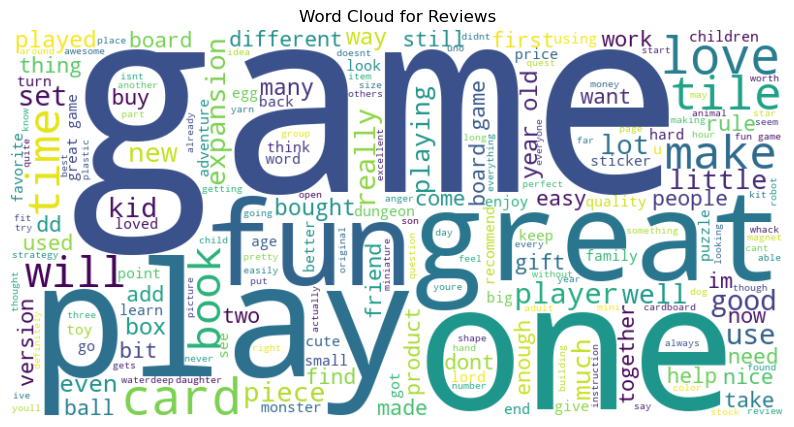

In [388]:
# Create Word Cloud for the 'Review' column
wordcloud_review = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_clean['Review'].dropna()))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.title("Word Cloud for Reviews")
plt.axis("off")
plt.show()

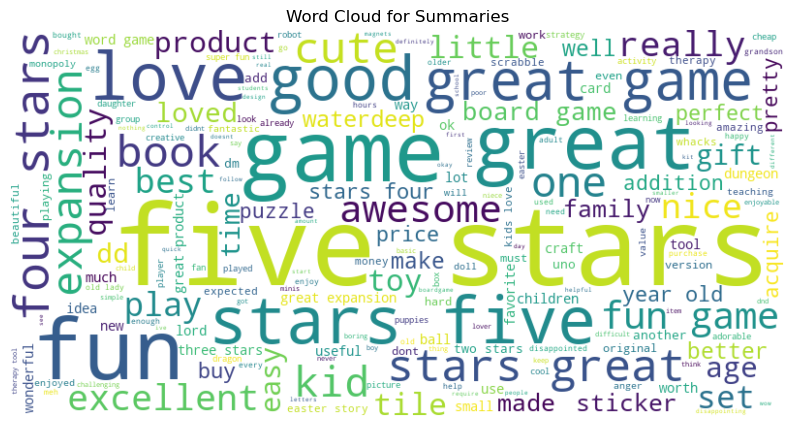

In [389]:
# Create Word Cloud for the 'Summary' column
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_clean['Summary'].dropna()))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.title("Word Cloud for Summaries")
plt.axis("off")
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

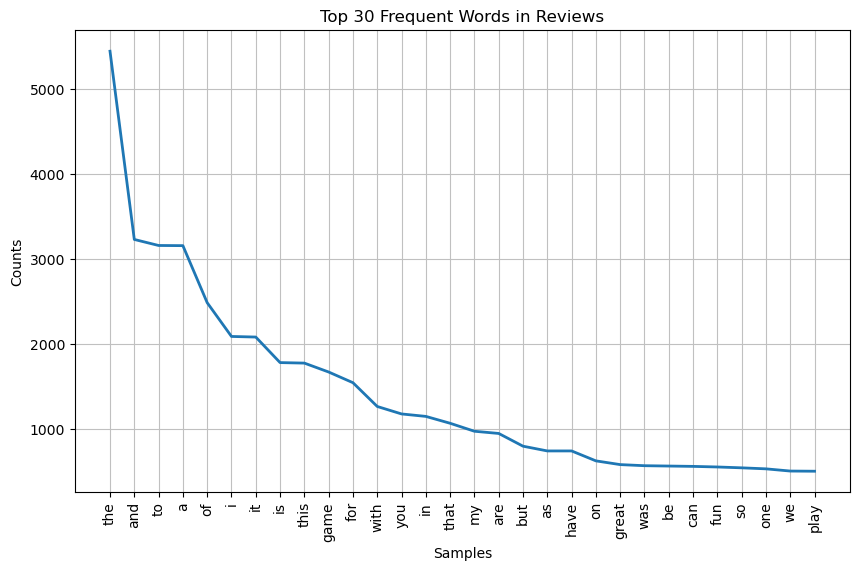

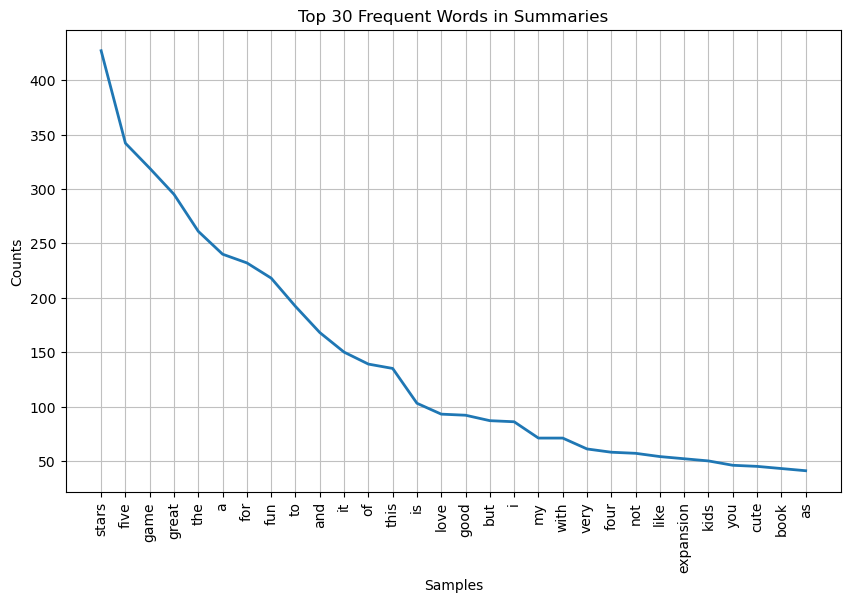

In [391]:
review_tokens_flat = [word for tokens in df_4['review_tokens'] for word in tokens]
summary_tokens_flat = [word for tokens in df_4['summary_tokens'] for word in tokens]

# Create frequency distribution for the 'Review' column
review_fdist = FreqDist(review_tokens_flat)

# Create frequency distribution for the 'Summary' column
summary_fdist = FreqDist(summary_tokens_flat)

# Plot frequency distribution for reviews (Top 30 most common words)
plt.figure(figsize=(10, 6))
review_fdist.plot(30, title="Top 30 Frequent Words in Reviews", cumulative=False)
plt.show()

# Plot frequency distribution for summaries (Top 30 most common words)
plt.figure(figsize=(10, 6))
summary_fdist.plot(30, title="Top 30 Frequent Words in Summaries", cumulative=False)
plt.show()

In [392]:
# Display the most common words for Review and Summary
print("Most common words in reviews:")
print(review_fdist.most_common(15))

print("\nMost common words in summaries:")
print(summary_fdist.most_common(15))

Most common words in reviews:
[('the', 5451), ('and', 3233), ('to', 3162), ('a', 3160), ('of', 2488), ('i', 2090), ('it', 2083), ('is', 1782), ('this', 1776), ('game', 1671), ('for', 1545), ('with', 1265), ('you', 1177), ('in', 1148), ('that', 1067)]

Most common words in summaries:
[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('the', 261), ('a', 240), ('for', 232), ('fun', 218), ('to', 192), ('and', 168), ('it', 150), ('of', 139), ('this', 135), ('is', 103), ('love', 93)]


### 4b) Remove alphanumeric characters and stopwords

In [394]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to remove alphanumeric characters and stopwords from tokens
def remove_alphanumeric_and_stopwords(tokens):
    return [word for word in tokens if word.isalpha() and word not in stop_words]

# Apply the function to remove alphanumeric characters and stopwords from the 'review' column
df_4['clean_review'] = df_4['review_tokens'].apply(lambda x: remove_alphanumeric_and_stopwords(x))

# Apply the function to remove alphanumeric characters and stopwords from the 'summary' column
df_4['clean_summary'] = df_4['summary_tokens'].apply(lambda x: remove_alphanumeric_and_stopwords(x))

# View the DataFrame with cleaned columns
display(df_4[['clean_review', 'clean_summary']].head())


,clean_review,clean_summary
0,"[comes, dms, screen, space, screen, absolute, ...","[fact, space, wasted, art, terribly, informati..."
1,"[open, letter, unpainted, miniatures, bad, spe...","[another, worthless, dungeon, masters, screen]"
2,"[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]"
3,"[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]"
4,"[review, previous, screens, completely, unnece...","[money, trap]"


### 4c) Create wordcloud without stopwords

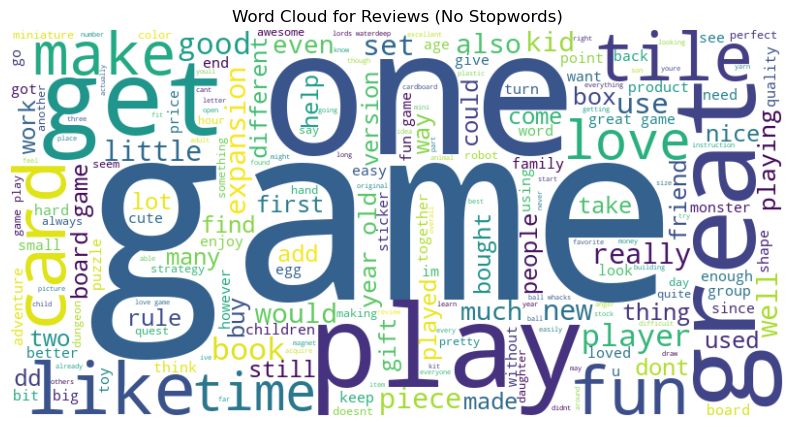

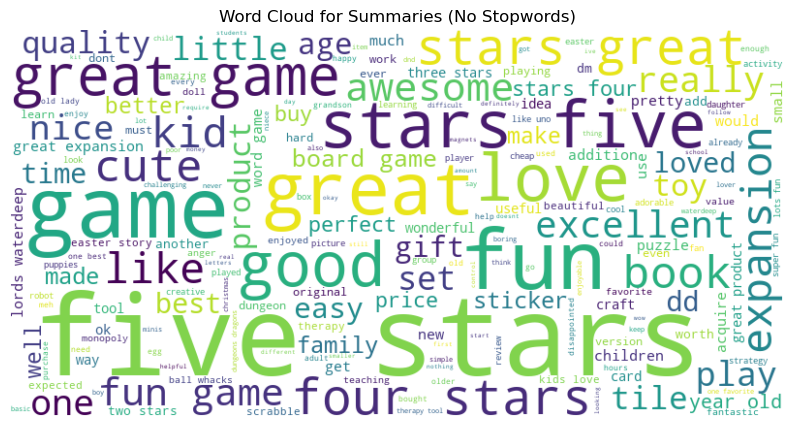

In [396]:
# Create and plot a word cloud for the 'Review' column without stopwords
wordcloud_review_no_stopwords = WordCloud(
    width=800, 
    height=400, 
    stopwords=stop_words,  # Exclude stopwords
    background_color='white'
).generate(' '.join(df_4['clean_review'].dropna().apply(' '.join)))

# Plot the WordCloud image for reviews
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_review_no_stopwords, interpolation='bilinear')
plt.title("Word Cloud for Reviews (No Stopwords)")
plt.axis("off")
plt.show()

# Create and plot a word cloud for the 'summary' column without stopwords
wordcloud_summary_no_stopwords = WordCloud(
    width=800, 
    height=400, 
    stopwords=stop_words,  # Exclude stopwords
    background_color='white'
).generate(' '.join(df_4['clean_summary'].dropna().apply(' '.join)))

# Plot the WordCloud image for summaries
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_summary_no_stopwords, interpolation='bilinear')
plt.title("Word Cloud for Summaries (No Stopwords)")
plt.axis("off")
plt.show()

### 4d) Identify 15 most common words and polarity

In [398]:
# 1. Frequency Distribution - Identify 15 Most Common Words (without stopwords)
# Create a frequency distribution for Reviews (cleaned, without stopwords)
review_fdist_clean = FreqDist([word for tokens in df_4['clean_review'] for word in tokens])

# Create a frequency distribution for Summaries (cleaned, without stopwords)
summary_fdist_clean = FreqDist([word for tokens in df_4['clean_summary'] for word in tokens])

# Print the 15 most common words in Reviews and Summaries
print("15 Most Common Words in Reviews:")
print(review_fdist_clean.most_common(15))

print("\n15 Most Common Words in Summaries:")
print(summary_fdist_clean.most_common(15))

# 2. Polarity Calculation - Calculate Polarity for Reviews and Summaries
# Calculate polarity for each review using TextBlob
df_4['review_polarity'] = df_4['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate polarity for each Summary using TextBlob
df_4['summary_polarity'] = df_4['Summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print the average polarity for Reviews and Summaries
avg_review_polarity = df_4['review_polarity'].mean()
avg_summary_polarity = df_4['summary_polarity'].mean()

print(f"\nAverage Polarity of Reviews: {avg_review_polarity}")
print(f"Average Polarity of Summaries: {avg_summary_polarity}")

15 Most Common Words in Reviews:
[('game', 1671), ('great', 580), ('fun', 552), ('one', 530), ('play', 502), ('like', 414), ('love', 323), ('really', 319), ('get', 319), ('cards', 301), ('tiles', 297), ('time', 291), ('good', 289), ('would', 280), ('book', 273)]

15 Most Common Words in Summaries:
[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('fun', 218), ('love', 93), ('good', 92), ('four', 58), ('like', 54), ('expansion', 52), ('kids', 50), ('cute', 45), ('book', 43), ('one', 38), ('awesome', 36)]

Average Polarity of Reviews: 0.21317026837990108
Average Polarity of Summaries: 0.22367835260523938


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [400]:
# Provided function
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [401]:
# Provided function to extract polarity score
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Determine polarity of both 'Review' and 'Summary' columns
df_4['review_polarity'] = df_4['Review'].apply(generate_polarity)
df_4['summary_polarity'] = df_4['Summary'].apply(generate_polarity)

# View the DataFrame with polarity values
display(df_4[['Review', 'review_polarity', 'Summary', 'summary_polarity']].head())

# Display the average polarity for both columns
avg_review_polarity = df_4['review_polarity'].mean()
avg_summary_polarity = df_4['summary_polarity'].mean()

print(f"Average Polarity of Reviews: {avg_review_polarity}")
print(f"Average Polarity of Summaries: {avg_summary_polarity}")

,Review,review_polarity,Summary,summary_polarity
0,when it comes to a dms screen the space on the...,-0.036111,the fact that 50 of this space is wasted on ar...,0.15
1,an open letter to galeforce9 your unpainted mi...,0.035952,another worthless dungeon masters screen from ...,-0.80
2,nice art nice printing why two panels are fill...,0.116640,pretty but also pretty useless,0.00
3,amazing buy bought it as a gift for our new dm...,0.578788,five stars,0.00
4,as my review of gf9s previous screens these we...,-0.316667,money trap,0.00


Average Polarity of Reviews: 0.21317026837990108
Average Polarity of Summaries: 0.22367835260523938


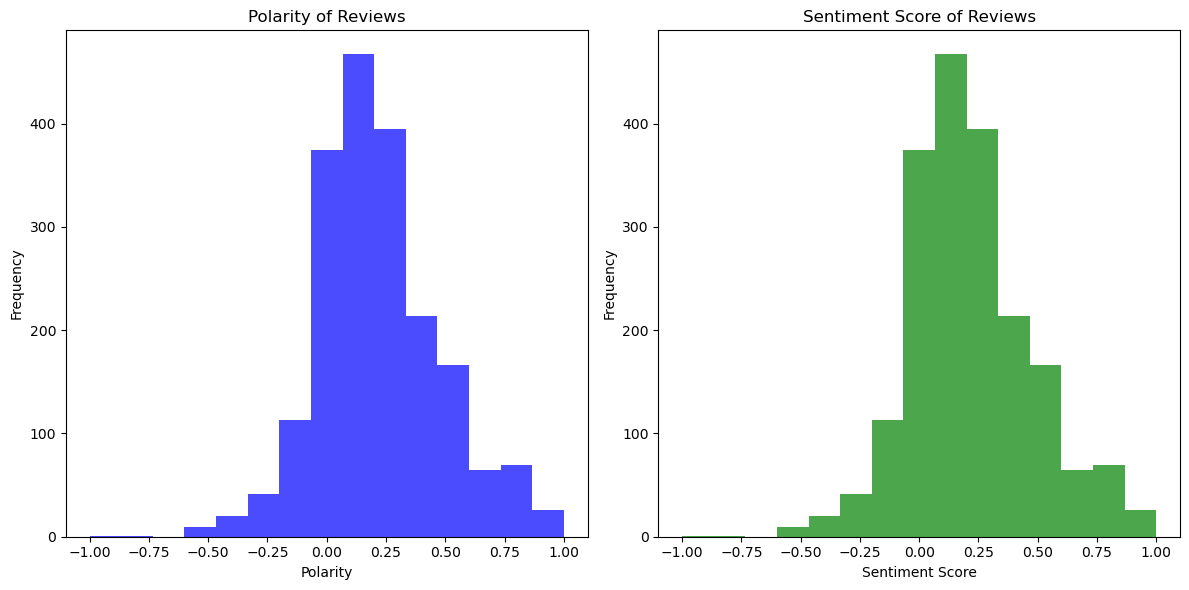

In [402]:
# Review: Create a histogram plot with bins = 15.
plt.figure(figsize=(12, 6))

# Calculate sentiment score based on polarity
# Sentiment score is simply the polarity value in this case.
df_4['review_sentiment'] = df_4['review_polarity']

# Histogram of polarity
plt.subplot(1, 2, 1)
plt.hist(df_4['review_polarity'], bins=15, color='blue', alpha=0.7)
plt.title('Polarity of Reviews')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Histogram of Sentiment Score
plt.subplot(1, 2, 2)
plt.hist(df_4['review_sentiment'], bins=15, color='green', alpha=0.7)
plt.title('Sentiment Score of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the histogram
plt.tight_layout()
plt.show()

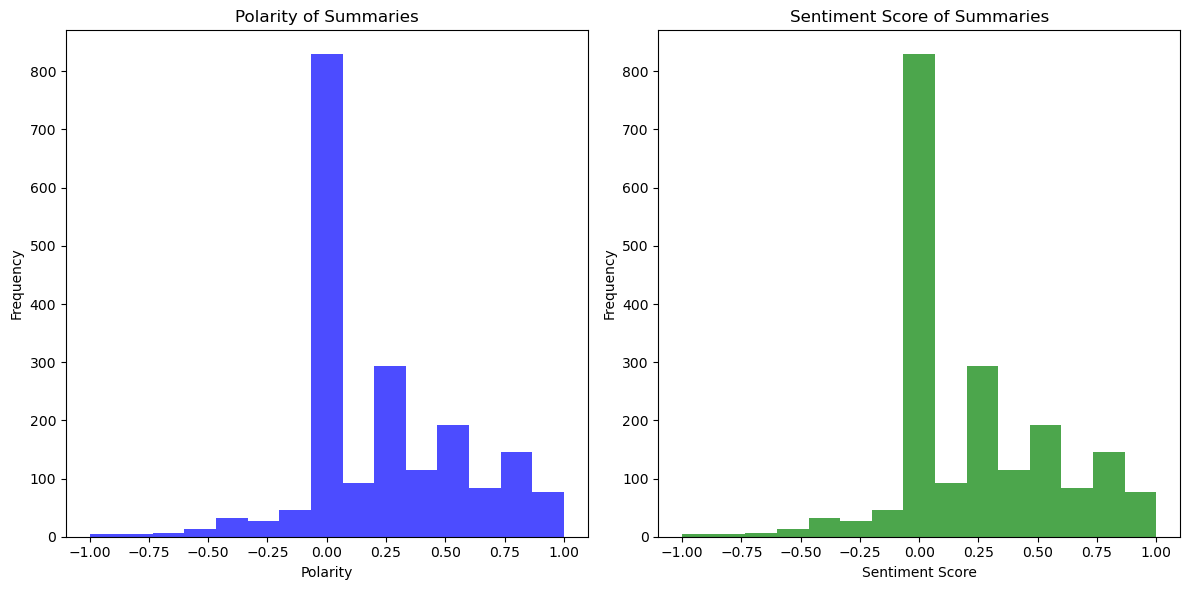

In [403]:
# Review: Create a histogram plot with bins = 15.
plt.figure(figsize=(12, 6))

# Calculate sentiment score based on polarity
# Sentiment score is simply the polarity value in this case.
df_4['summary_sentiment'] = df_4['summary_polarity']

# Histogram of polarity
plt.subplot(1, 2, 1)
plt.hist(df_4['summary_polarity'], bins=15, color='blue', alpha=0.7)
plt.title('Polarity of Summaries')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Histogram of Summary Sentiment Score
plt.subplot(1, 2, 2) 
plt.hist(df_4['summary_sentiment'], bins=15, color='green', alpha=0.7)
plt.title('Sentiment Score of Summaries')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the histogram
plt.tight_layout()
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [405]:
# Identify the top 20 positive and negative reviews based on polarity
top_positive_reviews = df_4.sort_values(by='review_polarity', ascending=False).head(20)
top_negative_reviews = df_4.sort_values(by='review_polarity', ascending=True).head(20)

# Identify the top 20 positive and negative summaries based on polarity
top_positive_summaries = df_4.sort_values(by='summary_polarity', ascending=False).head(20)
top_negative_summaries = df_4.sort_values(by='summary_polarity', ascending=True).head(20)

In [406]:
# Top 20 Negative Reviews

print("\nTop 20 Negative Reviews:")
display(top_negative_reviews[['Review', 'review_polarity']])


Top 20 Negative Reviews:


,Review,review_polarity
208,booo unles you are patient know how to measure...,-1.000000
182,incomplete kit very disappointing,-0.780000
1804,im sorry i just find this product to be boring...,-0.583333
364,one of my staff will be using this game soon s...,-0.550000
1524,expensive for what you get,-0.500000
117,i bought this as a christmas gift for my grand...,-0.500000
230,i found the directions difficult,-0.500000
290,instructions are complicated to follow,-0.500000
301,difficult,-0.500000
227,this was a gift for my daughter i found it dif...,-0.500000


In [407]:
# Top 20 Positive Reviews

print("Top 20 Positive Reviews:")
display(top_positive_reviews[['Review', 'review_polarity']])

Top 20 Positive Reviews:


,Review,review_polarity
790,perfect,1.0
1726,excellent toy to simulate thought,1.0
194,awesome gift,1.0
1967,perfect for tutoring my grandson in spelling,1.0
1177,awesome addition to my rpg gm system,1.0
1168,best set buy 2 if you have the means,1.0
524,perfect just what i ordered,1.0
1715,awesome toy,1.0
1720,it is the best thing to play with and also min...,1.0
621,wonderful for my grandson to learn the resurre...,1.0


In [408]:
# Top 20 Positive Summaries

print("\nTop 20 Positive Summaries:")
display(top_positive_summaries[['Summary', 'summary_polarity']])


Top 20 Positive Summaries:


,Summary,summary_polarity
1028,one of the best,1.0
1935,excellent,1.0
815,one of the best games ever,1.0
1630,awesome learning tool,1.0
163,he was very happy with his gift,1.0
1170,best orcs from wotc,1.0
1388,awesome expansion,1.0
1078,perfect gift,1.0
140,awesome sticker activity for the price,1.0
1171,awesome,1.0


In [409]:
# Top 20 Negative Summaries

print("\nTop 20 Negative Summaries:")
display(top_negative_summaries[['Summary', 'summary_polarity']])


Top 20 Negative Summaries:


,Summary,summary_polarity
208,boring unless you are a craft person which i am,-1.000000
21,the worst value ive ever seen,-1.000000
829,boring,-1.000000
1166,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
793,disappointed,-0.750000
1620,disappointed,-0.750000
144,disappointed,-0.750000
631,disappointed,-0.750000
363,promotes anger instead of teaching calming met...,-0.700000


## Insights and observations

## 1. Histograms of Polarity and Sentiment Scores

The histograms for the **polarity** and **sentiment scores** for both **reviews** and **summaries** were plotted to assess the overall sentiment distribution.

- **Reviews**:
  - The polarity of reviews is distributed more evenly around 0, suggesting a balanced mix of positive and negative sentiments. Most reviews fall within the neutral to slightly positive range.
  - The sentiment score for reviews mirrors this, with a similar spread, showing a slight inclination towards positive reviews.
  
- **Summaries**:
  - The polarity of summaries shows a strong concentration around 0, indicating a lot of neutral summaries. A smaller portion of summaries shows a positive polarity.
  - The sentiment scores for summaries have a peak at the lower end, reflecting a neutral sentiment, with a few positive and negative outliers.

## 2. Most Common Words

The **15 most common words** from the **reviews** and **summaries** offer insights into the focus of customer feedback:

- **Reviews**:
  - Common words like **"the"**, **"and"**, **"to"**, and **"a"** are stopwords, but more relevant words like **"game"**, **"is"**, and **"it"** also appear frequently. These indicate that the reviews primarily discuss the game and its features.
  
- **Summaries**:
  - Words like **"stars"**, **"five"**, **"game"**, and **"great"** suggest that summaries often rate the product and describe its quality, with a focus on overall satisfaction.

## 3. Top Positive and Negative Reviews and Summaries

From the sentiment analysis, we identified the top **positive** and **negative** reviews and summaries.

- **Top Positive Reviews**:
  - Reviews with **positive polarity** include those describing the game as **"great"** or **"amazing"**.
  
- **Top Negative Reviews**:
  - Reviews with **negative polarity** mention issues like **"money trap"** or **"useless"**, which reflect dissatisfaction.

- **Top Positive Summaries**:
  - The most positive summaries mention terms like **"five stars"** and **"love"**.
  
- **Top Negative Summaries**:
  - Negative summaries include words such as **"worthless"** and **"pretty useless"**, indicating displeasure with the product.

## 4. Average Polarity

- **Average Polarity of Reviews**: 0.213
- **Average Polarity of Summaries**: 0.224

Both reviews and summaries have **slightly positive polarity**, indicating that the general sentiment is favorable, but there are still mixed feelings expressed by customers.

---

## Conclusion

The overall sentiment in the **reviews** and **summaries** appears to be slightly positive, with many users expressing satisfaction with the product. However, there are also notable negative sentiments that could indicate areas for improvement, particularly around the product's utility or value.